In [2]:
from pycaret.regression import *
from pycaret.datasets import get_data
import pandas as pd
df0 = pd.read_csv('C:/Users/Rui/OneDrive/桌面/data_xn/CADCHF_six_hourly_data.csv')
print(df0.shape)
df0.head()

(1164, 12)


,datetime,v,vw,o,c,h,l,t,n,hourly_vwap,hourly_liquidity,fd
0,2010-03-17 18:00:00,550.000000,1.043059,1.042975,1.043175,1.04369,1.04249,5.012014e+13,550.000000,573.668558,550.000000,458333.333333
1,2010-03-18 00:00:00,2487.000000,1.044357,1.044225,1.044660,1.04762,1.04239,5.604224e+13,2487.000000,2598.565053,2487.000000,475525.812619
2,2010-03-18 06:00:00,3842.666667,1.047351,1.046940,1.047240,1.04940,1.04499,6.006139e+13,3842.666667,4024.545475,3842.666667,871352.985639
3,2010-03-18 12:00:00,2133.000000,1.043741,1.044248,1.043305,1.04869,1.04009,5.498670e+13,2133.000000,2228.348621,2133.000000,248023.255814
4,2010-03-18 18:00:00,631.000000,1.042128,1.042268,1.041798,1.04319,1.03889,5.202680e+13,631.000000,657.494664,631.000000,146744.186047


In [3]:
(df0.isnull().sum() / len(df0)).sort_values(ascending=False)[:20]

vw                  0.257732
o                   0.257732
c                   0.257732
h                   0.257732
l                   0.257732
hourly_vwap         0.257732
fd                  0.257732
datetime            0.000000
v                   0.000000
t                   0.000000
n                   0.000000
hourly_liquidity    0.000000
dtype: float64

In [4]:
df = df0.dropna(subset=['hourly_vwap'])  # Replace 'column_name' with the name of the column

In [5]:
data = df.sample(frac=0.7, random_state=786)
data_unseen = df.drop(data.index)
 
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
 
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (605, 12)
Unseen Data For Predictions: (259, 12)


In [6]:
from pycaret.regression import *
setup(data = data, target = 'hourly_vwap', session_id=123) 

,Description,Value
0,Session id,123
1,Target,hourly_vwap
2,Target type,Regression
3,Original data shape,"(605, 12)"
4,Transformed data shape,"(605, 12)"
5,Transformed train set shape,"(423, 12)"
6,Transformed test set shape,"(182, 12)"
7,Numeric features,10
8,Categorical features,1
9,Preprocess,True


In [7]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,145.9247,50378.9164,216.9245,0.9937,0.2578,0.1676,0.3400
lasso,Lasso Regression,143.0625,50834.9164,217.7248,0.9937,0.2582,0.1684,0.2110
ridge,Ridge Regression,141.5864,51904.7739,219.9943,0.9936,0.2586,0.1688,0.1470
et,Extra Trees Regressor,94.8219,145337.8987,269.0484,0.9918,0.1079,0.0405,0.1160
gbr,Gradient Boosting Regressor,140.3835,177020.3502,317.1579,0.9897,0.1362,0.0696,0.1130
en,Elastic Net,239.4477,105930.0114,321.4449,0.9860,0.2825,0.2146,0.0620
br,Bayesian Ridge,244.0879,108852.3627,326.0071,0.9856,0.2837,0.2168,0.0700
rf,Random Forest Regressor,163.7765,361966.4893,407.8428,0.9816,0.1238,0.0579,0.1370
dt,Decision Tree Regressor,197.6470,223901.8393,411.9723,0.9809,0.1655,0.0732,0.0740
ada,AdaBoost Regressor,362.1525,311762.8824,523.4793,0.9691,0.3504,0.3339,0.0890


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [10]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,156.0887,37026.3733,192.4224,0.9960,0.2833,0.1660
1,146.0160,48235.8617,219.6266,0.9912,0.2028,0.0998
2,127.9011,44707.5053,211.4415,0.9926,0.2015,0.0915
3,178.4783,85585.3720,292.5498,0.9971,0.3320,0.2071
4,151.3570,45189.5971,212.5784,0.9949,0.3526,0.2363
5,103.9574,19164.8100,138.4370,0.9943,0.0636,0.0405
6,186.3758,120964.6463,347.7997,0.9863,0.2929,0.1761
7,145.7754,40125.9597,200.3147,0.9931,0.4706,0.4255
8,133.6534,33952.5492,184.2622,0.9929,0.3051,0.1875


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,156.0887,37026.3733,192.4224,0.9960,0.2833,0.1660
1,146.0160,48235.8617,219.6266,0.9912,0.2028,0.0998
2,127.9011,44707.5053,211.4415,0.9926,0.2015,0.0915
3,178.4783,85585.3720,292.5498,0.9971,0.3320,0.2071
4,151.3570,45189.5971,212.5784,0.9949,0.3526,0.2363
5,103.9574,19164.8100,138.4370,0.9943,0.0636,0.0405
6,186.3758,120964.6463,347.7997,0.9863,0.2929,0.1761
7,145.7754,40125.9597,200.3147,0.9931,0.4706,0.4255
8,133.6534,33952.5492,184.2622,0.9929,0.3051,0.1875


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


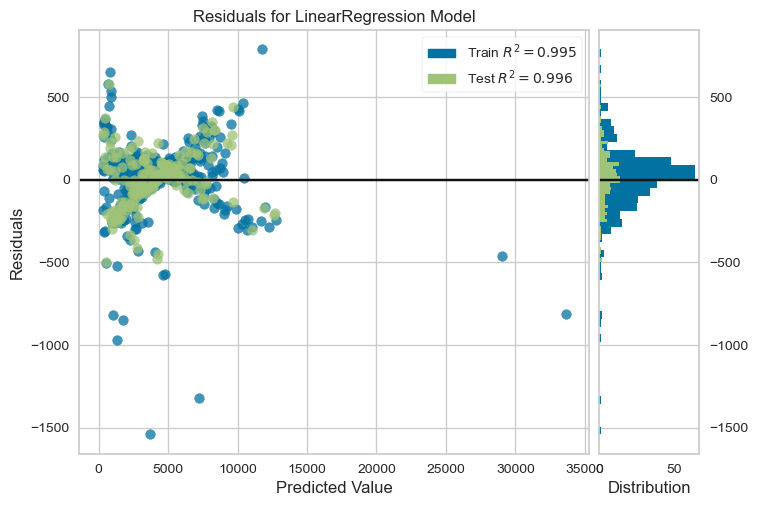

In [12]:
plot_model(lr)

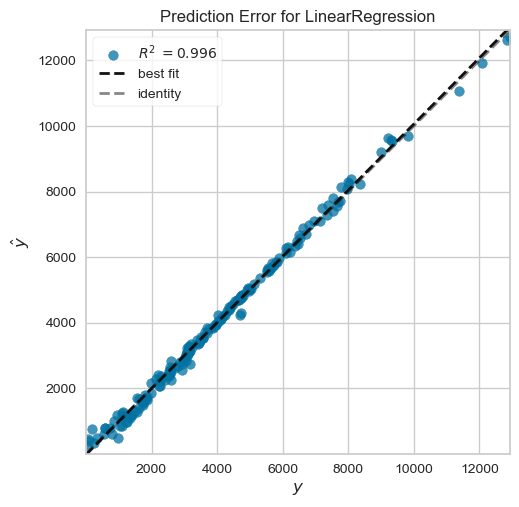

In [13]:
plot_model(lr, plot = 'error')

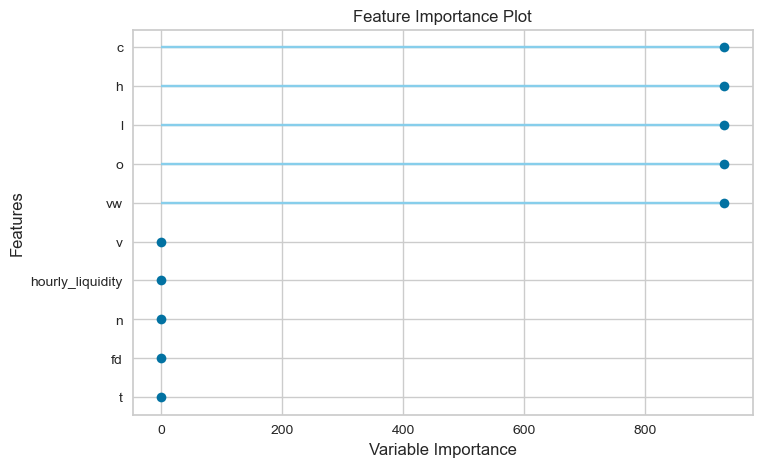

In [14]:
plot_model(tuned_lr, plot='feature')

In [17]:
predict_model(lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,127.2278,28285.3047,168.1824,0.9956,0.3764,0.5174


In [18]:
final_lr = finalize_model(lr)
print(final_lr)

Pipeline(memory=FastMemory(location=C:\Users\Rui\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['v', 'vw', 'o', 'c', 'h', 'l', 't',
                                             'n', 'hourly_liquidity', 'fd'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['datetime'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['datetime'],
                                    transformer=LeaveOneOutEncoder(cols=['datetime'],
                                                                   handle_missing='return_nan',
                                                                   random_state=123))),
                ('actual_estimator', LinearRegression(n_jobs=-1))])
